In [2]:
# Generate random burst time and arrival time in the CSV file
import pandas as pd
import numpy as np

# Number of processes
n = 100

# Generate process IDs from 1 to 100
processes = list(range(1, n + 1))

# Generate random arrival times between 0 and 20
arrival_times = np.random.randint(0, 20, size=n)

# Generate random burst times between 1 and 10
burst_times = np.random.randint(1, 10, size=n)

# Create a DataFrame
df = pd.DataFrame({
    'Process': processes,
    'Arrival_Time': arrival_times,
    'Burst_Time': burst_times
})

# Save the DataFrame to a CSV file
df.to_csv('OS_Processes.csv', index=False)

# Acknowledgement if the process is done
print("CSV file 'process_data.csv' with random arrival and burst times for 100 processes has been created.")


CSV file 'process_data.csv' with random arrival and burst times for 100 processes has been created.


Processes    Arrival Time    Burst Time    Waiting Time    Turnaround Time    Response Time
    1             15             7             0             7             0
    2             11             1             11             12             11
    3             10             7             13             20             13
    4             10             8             20             28             20
    5             7             1             31             32             31
    6             7             2             32             34             32
    7             9             8             32             40             32
    8             7             4             42             46             42
    9             14             8             39             47             39
    10             16             1             45             46             45
    11             14             4             48             52             48
    12             18            

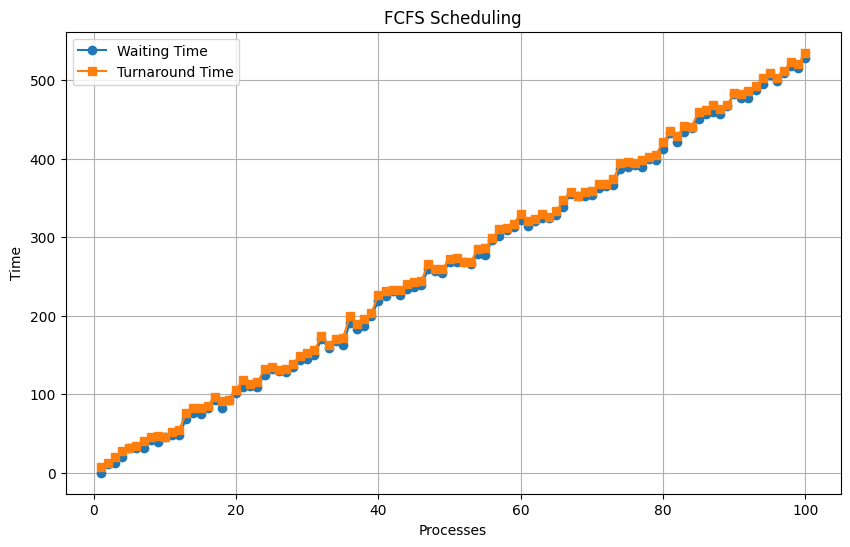

In [5]:
#FCFS

import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the waiting time for each process
def calculate_waiting_time(processes, n, burst_times, arrival_times, waiting_times):
    service_time = [0] * n
    service_time[0] = arrival_times[0]
    waiting_times[0] = 0

    # Calculate waiting time for each process
    for i in range(1, n):
        # Calculate cumulative service time for each process
        service_time[i] = service_time[i - 1] + burst_times[i - 1]
        
        # Calculate waiting time
        waiting_times[i] = service_time[i] - arrival_times[i]
        
        # Ensure that waiting time is not negative
        if waiting_times[i] < 0:
            waiting_times[i] = 0

# Function to calculate turnaround time for each process
def calculate_turnaround_time(n, burst_times, waiting_times, turnaround_times):
    # Calculate turnaround time by adding burst time and waiting time
    for i in range(n):
        turnaround_times[i] = burst_times[i] + waiting_times[i]

# Function to calculate response time for each process (for FCFS, it's equal to the waiting time)
def calculate_response_time(n, waiting_times, response_times):
    for i in range(n):
        response_times[i] = waiting_times[i]

# Function to perform FCFS scheduling
def fcfs_scheduling(processes, n, burst_times, arrival_times):
    waiting_times = [0] * n
    turnaround_times = [0] * n
    response_times = [0] * n

    # Calculate waiting times
    calculate_waiting_time(processes, n, burst_times, arrival_times, waiting_times)

    # Calculate turnaround times
    calculate_turnaround_time(n, burst_times, waiting_times, turnaround_times)

    # Calculate response times (same as waiting times for FCFS)
    calculate_response_time(n, waiting_times, response_times)

    # Display process details
    print("Processes    Arrival Time    Burst Time    Waiting Time    Turnaround Time    Response Time")
    total_waiting_time = 0
    total_turnaround_time = 0
    total_response_time = 0

    for i in range(n):
        total_waiting_time += waiting_times[i]
        total_turnaround_time += turnaround_times[i]
        total_response_time += response_times[i]
        print(f"    {processes[i]}             {arrival_times[i]}             {burst_times[i]}             {waiting_times[i]}             {turnaround_times[i]}             {response_times[i]}")

    # Calculate average waiting time, average turnaround time, and average response time
    avg_waiting_time = total_waiting_time / n
    avg_turnaround_time = total_turnaround_time / n
    avg_response_time = total_response_time / n

    # Calculate CPU Utilization
    total_idle_time = sum(waiting_times)
    total_burst_time = sum(burst_times)
    cpu_utilization = (total_burst_time / (total_burst_time + total_idle_time)) * 100

    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")
    

    # Plot the graph for waiting time, turnaround time, and response time
    plt.figure(figsize=(10, 6))
    plt.plot(processes, waiting_times, label='Waiting Time', marker='o')
    plt.plot(processes, turnaround_times, label='Turnaround Time', marker='s')
    plt.xlabel('Processes')
    plt.ylabel('Time')
    plt.title('FCFS Scheduling')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to read process details from a CSV file and call the FCFS scheduling function
if __name__ == "__main__":
    # Read data from CSV file
    df = pd.read_csv('OS_Processes.csv')

    # Extract processes, arrival times, and burst times
    processes = df['Process'].tolist()
    arrival_times = df['Arrival_Time'].tolist()
    burst_times = df['Burst_Time'].tolist()

    # Number of processes
    n = len(processes)

    # Call the FCFS scheduling function
    fcfs_scheduling(processes, n, burst_times, arrival_times)


Processes    Arrival Time    Burst Time    Waiting Time    Turnaround Time    Response Time
    1             15             7             208             215             208
    2             11             1             1             2             1
    3             10             7             220             227             220
    4             10             8             318             326             318
    5             7             1             1             2             1
    6             7             2             3             5             3
    7             9             8             327             335             327
    8             7             4             55             59             55
    9             14             8             330             338             330
    10             16             1             0             1             0
    11             14             4             52             56             52
    12             18      

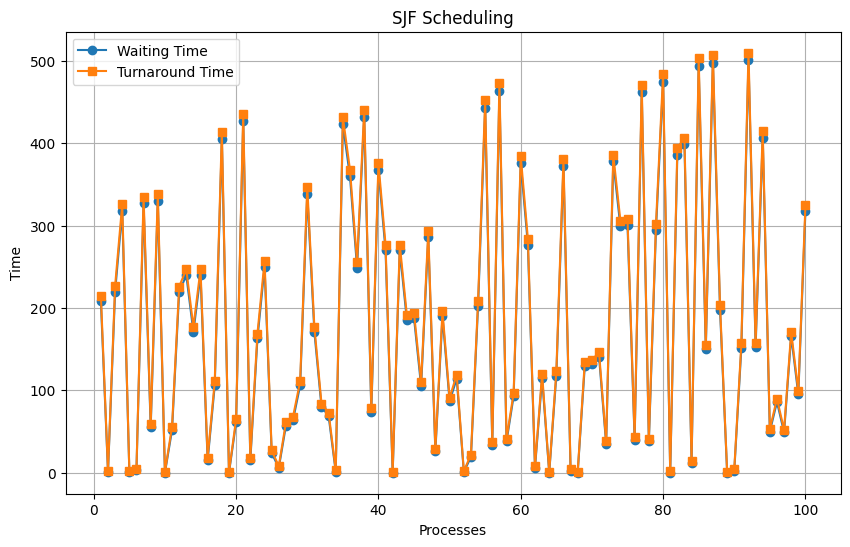

In [4]:
#SJF

import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the waiting time for each process using SJF scheduling
def calculate_waiting_time(processes, n, burst_times, arrival_times, waiting_times):
    # Create lists to keep track of the remaining burst times and completion times
    remaining_burst_times = burst_times.copy()
    completed = [False] * n
    current_time = 0
    completed_count = 0

    # Process until all processes are completed
    while completed_count < n:
        # Find the next process with the shortest remaining burst time that has arrived
        min_burst_time = float('inf')
        shortest_job_index = -1

        for i in range(n):
            if (arrival_times[i] <= current_time and not completed[i] and
                    remaining_burst_times[i] < min_burst_time):
                min_burst_time = remaining_burst_times[i]
                shortest_job_index = i

        # If no process is found, increment the time and continue
        if shortest_job_index == -1:
            current_time += 1
            continue

        # Process the shortest job
        current_time += remaining_burst_times[shortest_job_index]
        waiting_times[shortest_job_index] = current_time - arrival_times[shortest_job_index] - burst_times[shortest_job_index]
        completed[shortest_job_index] = True
        completed_count += 1

        # Ensure that waiting time is not negative
        if waiting_times[shortest_job_index] < 0:
            waiting_times[shortest_job_index] = 0

# Function to calculate turnaround time for each process
def calculate_turnaround_time(n, burst_times, waiting_times, turnaround_times):
    for i in range(n):
        turnaround_times[i] = burst_times[i] + waiting_times[i]

# Function to calculate response time for each process (for SJF, it's equal to the waiting time)
def calculate_response_time(n, waiting_times, response_times):
    for i in range(n):
        response_times[i] = waiting_times[i]

# Function to perform SJF scheduling
def sjf_scheduling(processes, n, burst_times, arrival_times):
    waiting_times = [0] * n
    turnaround_times = [0] * n
    response_times = [0] * n

    # Calculate waiting times using SJF scheduling
    calculate_waiting_time(processes, n, burst_times, arrival_times, waiting_times)

    # Calculate turnaround times
    calculate_turnaround_time(n, burst_times, waiting_times, turnaround_times)

    # Calculate response times (same as waiting times for SJF)
    calculate_response_time(n, waiting_times, response_times)

    # Display process details
    print("Processes    Arrival Time    Burst Time    Waiting Time    Turnaround Time    Response Time")
    total_waiting_time = 0
    total_turnaround_time = 0
    total_response_time = 0

    for i in range(n):
        total_waiting_time += waiting_times[i]
        total_turnaround_time += turnaround_times[i]
        total_response_time += response_times[i]
        print(f"    {processes[i]}             {arrival_times[i]}             {burst_times[i]}             {waiting_times[i]}             {turnaround_times[i]}             {response_times[i]}")

    # Calculate average waiting time, average turnaround time, and average response time
    avg_waiting_time = total_waiting_time / n
    avg_turnaround_time = total_turnaround_time / n
    avg_response_time = total_response_time / n

    # Calculate CPU Utilization
    total_idle_time = sum(waiting_times)
    total_burst_time = sum(burst_times)
    cpu_utilization = (total_burst_time / (total_burst_time + total_idle_time)) * 100

    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")
    

    # Plot the graph for waiting time, turnaround time, and response time
    plt.figure(figsize=(10, 6))
    plt.plot(processes, waiting_times, label='Waiting Time', marker='o')
    plt.plot(processes, turnaround_times, label='Turnaround Time', marker='s')
    plt.xlabel('Processes')
    plt.ylabel('Time')
    plt.title('SJF Scheduling')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to read process details from a CSV file and call the SJF scheduling function
if __name__ == "__main__":
    # Read data from CSV file
    df = pd.read_csv('OS_Processes.csv')

    # Extract processes, arrival times, and burst times
    processes = df['Process'].tolist()
    arrival_times = df['Arrival_Time'].tolist()
    burst_times = df['Burst_Time'].tolist()

    # Number of processes
    n = len(processes)

    # Call the SJF scheduling function
    sjf_scheduling(processes, n, burst_times, arrival_times)


In [2]:
#Add priority column in the CSV
import pandas as pd
import numpy as np

# Read the existing CSV file
df = pd.read_csv('OS_Processes.csv')

# Generate random priority values between 1 and 10 (you can adjust this range)
n = len(df)  # Ensure the number of priorities matches the number of rows in the DataFrame
priorities = np.random.randint(1, 10, size=n)

# Add the Priority column to the DataFrame
df['Priority'] = priorities

# Save the updated DataFrame back to a CSV file
df.to_csv('OS_Processes.csv', index=False)

print("CSV file 'OS_Processes_with_Priority.csv' with random priorities for 100 processes has been created.")


CSV file 'OS_Processes_with_Priority.csv' with random priorities for 100 processes has been created.


Processes    Arrival Time    Burst Time    Priority    Waiting Time    Turnaround Time    Response Time
    1             15             7             8             418             425             418
    2             11             1             4             232             233             232
    3             10             7             3             144             151             144
    4             10             8             9             485             493             485
    5             7             1             9             466             467             466
    6             7             2             5             285             287             285
    7             9             8             9             469             477             469
    8             7             4             9             467             471             467
    9             14             8             4             237             245             237
    10             16      

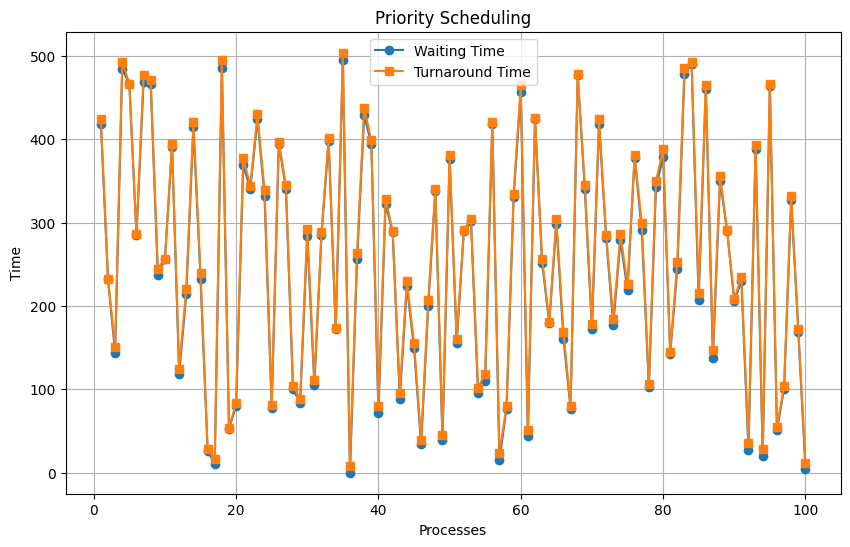

In [6]:
#Priority Scheduling

import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate waiting time for each process
def calculate_waiting_time(processes, n, burst_times, arrival_times, priorities, waiting_times):
    completed = [False] * n  # Track if a process is completed
    current_time = 0  # Current time in the system
    remaining_processes = n  # Remaining processes to be scheduled
    
    while remaining_processes > 0:
        # Find the process with the highest priority that has arrived and is not yet completed
        idx = -1
        highest_priority = float('inf')
        
        for i in range(n):
            if arrival_times[i] <= current_time and not completed[i]:
                if priorities[i] < highest_priority:
                    highest_priority = priorities[i]
                    idx = i
                # If priorities are equal, choose the one that arrived first
                elif priorities[i] == highest_priority:
                    if arrival_times[i] < arrival_times[idx]:
                        idx = i

        if idx != -1:
            # Process found: calculate its waiting time
            waiting_times[idx] = current_time - arrival_times[idx]
            # Update current time and mark the process as completed
            current_time += burst_times[idx]
            completed[idx] = True
            remaining_processes -= 1
        else:
            # If no process is found, increment the current time (idle time)
            current_time += 1

# Function to calculate turnaround time for each process
def calculate_turnaround_time(n, burst_times, waiting_times, turnaround_times):
    # Calculate turnaround time by adding burst time and waiting time
    for i in range(n):
        turnaround_times[i] = burst_times[i] + waiting_times[i]

# Function to calculate response time for each process (same as waiting time in non-preemptive Priority Scheduling)
def calculate_response_time(n, waiting_times, response_times):
    for i in range(n):
        response_times[i] = waiting_times[i]

# Function to perform Priority Scheduling
def priority_scheduling(processes, n, burst_times, arrival_times, priorities):
    waiting_times = [0] * n
    turnaround_times = [0] * n
    response_times = [0] * n

    # Calculate waiting times
    calculate_waiting_time(processes, n, burst_times, arrival_times, priorities, waiting_times)

    # Calculate turnaround times
    calculate_turnaround_time(n, burst_times, waiting_times, turnaround_times)

    # Calculate response times (same as waiting times for non-preemptive Priority Scheduling)
    calculate_response_time(n, waiting_times, response_times)

    # Display process details
    print("Processes    Arrival Time    Burst Time    Priority    Waiting Time    Turnaround Time    Response Time")
    total_waiting_time = 0
    total_turnaround_time = 0
    total_response_time=0

    for i in range(n):
        total_waiting_time += waiting_times[i]
        total_turnaround_time += turnaround_times[i]
        total_response_time += response_times[i]
        print(f"    {processes[i]}             {arrival_times[i]}             {burst_times[i]}             {priorities[i]}             {waiting_times[i]}             {turnaround_times[i]}             {response_times[i]}")

    # Calculate average waiting time, average turnaround time, and average response time
    avg_waiting_time = total_waiting_time / n
    avg_turnaround_time = total_turnaround_time / n
    avg_response_time = total_response_time / n

    # Calculate CPU Utilization
    total_idle_time = sum(waiting_times)
    total_burst_time = sum(burst_times)
    cpu_utilization = (total_burst_time / (total_burst_time + total_idle_time)) * 100

    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")
    

    # Plot the graph for waiting time, turnaround time, and response time
    plt.figure(figsize=(10, 6))
    plt.plot(processes, waiting_times, label='Waiting Time', marker='o')
    plt.plot(processes, turnaround_times, label='Turnaround Time', marker='s')
    plt.xlabel('Processes')
    plt.ylabel('Time')
    plt.title('Priority Scheduling')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to read process details from a CSV file and call the Priority Scheduling function
if __name__ == "__main__":
    # Read data from CSV file
    df = pd.read_csv('OS_Processes.csv')

    # Extract processes, arrival times, burst times, and priorities
    processes = df['Process'].tolist()
    arrival_times = df['Arrival_Time'].tolist()
    burst_times = df['Burst_Time'].tolist()
    priorities = df['Priority'].tolist()

    # Number of processes
    n = len(processes)

    # Call the Priority Scheduling function
    priority_scheduling(processes, n, burst_times, arrival_times, priorities)


Process	Waiting Time	Turnaround Time
1	96	103
2	299	300
3	392	399
4	399	407
5	211	212
6	174	176
7	506	514
8	317	321
9	76	84
10	16	17
11	462	466
12	280	287
13	215	222
14	385	391
15	93	100
16	233	236
17	68	73
18	326	335
19	291	292
20	33	37
21	267	276
22	113	116
23	80	86
24	203	210
25	196	199
26	1	3
27	465	469
28	41	45
29	408	413
30	33	41
31	478	484
32	333	337
33	133	137
34	375	377
35	416	425
36	0	8
37	312	319
38	148	157
39	191	195
40	130	138
41	314	321
42	511	512
43	386	393
44	373	379
45	148	154
46	139	144
47	460	467
48	192	195
49	180	186
50	111	115
51	111	116
52	210	211
53	251	254
54	229	235
55	235	244
56	466	469
57	72	81
58	418	421
59	300	304
60	500	508
61	437	444
62	464	466
63	344	349
64	35	36
65	50	55
66	127	135
67	464	467
68	314	315
69	301	306
70	163	168
71	345	350
72	180	183
73	359	367
74	288	295
75	276	283
76	460	463
77	245	254
78	476	479
79	6	13
80	432	441
81	296	298
82	413	421
83	8	16
84	410	412
85	181	190
86	503	508
87	26	35
88	320	326
89	499	500
90	164	166
91	239	244
92	351	36

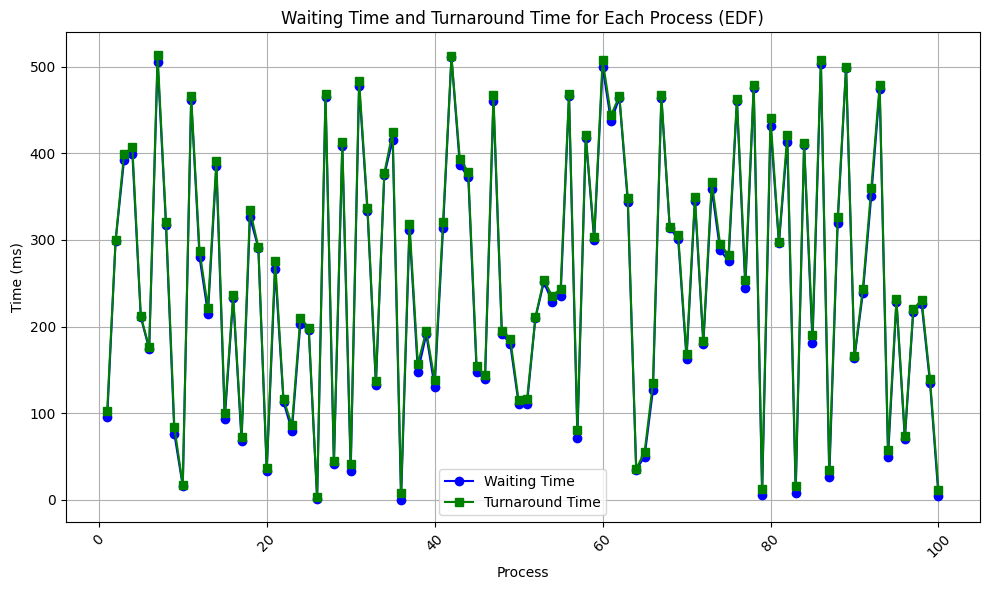


Average Waiting Time: 253.83
Average Turnaround Time: 259.06


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate metrics for EDF
def edf_scheduling(processes, n, burst_times, arrival_times, deadlines):
    waiting_times = [0] * n
    turnaround_times = [0] * n
    completed = [False] * n
    current_time = 0
    completed_processes = 0

    while completed_processes < n:
        idx = -1
        earliest_deadline = float('inf')

        # Select the process with the earliest deadline that has arrived
        for i in range(n):
            if arrival_times[i] <= current_time and not completed[i]:
                if deadlines[i] < earliest_deadline:
                    earliest_deadline = deadlines[i]
                    idx = i

        if idx != -1:
            # Calculate waiting time for the selected process
            waiting_times[idx] = current_time - arrival_times[idx]
            if waiting_times[idx] < 0:
                waiting_times[idx] = 0
            # Calculate turnaround time for the selected process
            turnaround_times[idx] = waiting_times[idx] + burst_times[idx]
            # Move the current time forward by the burst time of the selected process
            current_time += burst_times[idx]
            # Mark the process as completed
            completed[idx] = True
            completed_processes += 1
        else:
            # If no process has arrived yet, increment the current time
            current_time += 1

    # Calculate average waiting and turnaround times
    avg_waiting_time = sum(waiting_times) / n
    avg_turnaround_time = sum(turnaround_times) / n

    # Print the results for each process
    print("Process\tWaiting Time\tTurnaround Time")
    for i in range(n):
        print(f"{processes[i]}\t{waiting_times[i]}\t{turnaround_times[i]}")

    return waiting_times, turnaround_times, avg_waiting_time, avg_turnaround_time

# Main function to read process details and plot the line graph
if __name__ == "__main__":
    # Read data from CSV file
    df = pd.read_csv('OS_Processes_Updated.csv')

    processes = df['Process'].tolist()
    arrival_times = df['Arrival_Time'].tolist()
    burst_times = df['Burst_Time'].tolist()
    deadlines = df['Deadline'].tolist()  # Ensure the Deadline column is in the CSV
    n = len(processes)

    # Run EDF and store the results
    waiting_times, turnaround_times, avg_waiting_time, avg_turnaround_time = edf_scheduling(
        processes, n, burst_times.copy(), arrival_times, deadlines
    )

    # Convert results to a DataFrame for easier plotting
    results_df = pd.DataFrame({
        'Process': processes,
        'Waiting Time': waiting_times,
        'Turnaround Time': turnaround_times
    })

    # Plot the results using line graphs
    plt.figure(figsize=(10, 6))

    # Plot Waiting Time for each process
    plt.plot(results_df['Process'], results_df['Waiting Time'], label='Waiting Time', marker='o', color='blue')
    # Plot Turnaround Time for each process
    plt.plot(results_df['Process'], results_df['Turnaround Time'], label='Turnaround Time', marker='s', color='green')

    # Adding labels and title
    plt.xlabel('Process')
    plt.ylabel('Time (ms)')
    plt.title('Waiting Time and Turnaround Time for Each Process (EDF)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print average metrics
    print(f"\nAverage Waiting Time: {avg_waiting_time}")
    print(f"Average Turnaround Time: {avg_turnaround_time}")


Processes    Arrival Time    Burst Time    Waiting Time    Turnaround Time    Response Ratio
    36             0             8             0             8             1.00
    42             2             1             6             7             7.00
    81             0             2             9             11             5.50
    90             1             2             10             12             6.00
    5             7             1             6             7             7.00
    68             9             1             5             6             6.00
    2             11             1             4             5             5.00
    6             7             2             9             11             5.50
    67             3             3             15             18             6.00
    89             15             1             6             7             7.00
    10             16             1             6             7             7.00
    52             16

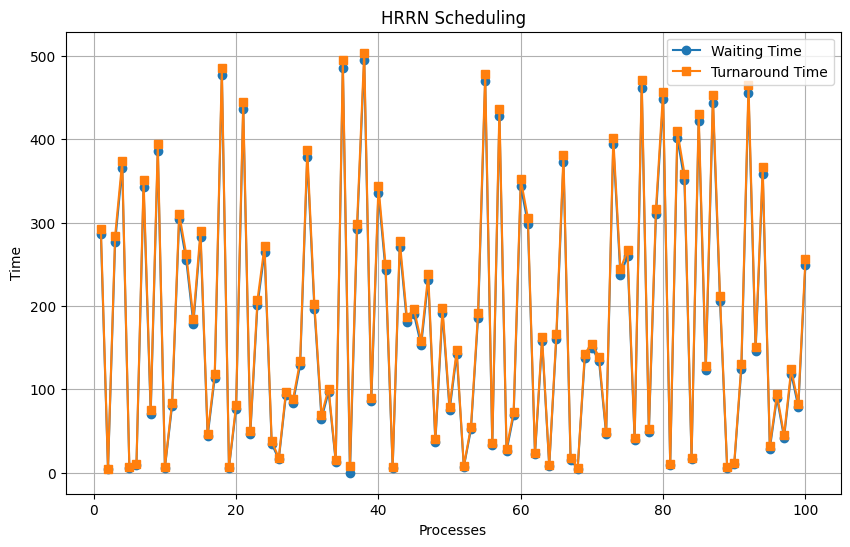

In [1]:
# HRRN
import pandas as pd
import matplotlib.pyplot as plt

# Function to simulate HRRN scheduling
def hrrn_scheduling(processes, n, burst_times, arrival_times):
    # Initialize time tracking
    current_time = 0
    waiting_times = [0] * n
    turnaround_times = [0] * n
    response_ratios = [0] * n
    completed = [False] * n

    completed_processes = 0
    total_waiting_time = 0
    total_turnaround_time = 0

    print("Processes    Arrival Time    Burst Time    Waiting Time    Turnaround Time    Response Ratio")

    while completed_processes < n:
        # Find the process with the highest response ratio among those that have arrived and are not completed
        hrrn = -1
        selected_process_index = -1

        for i in range(n):
            if arrival_times[i] <= current_time and not completed[i]:
                # Calculate waiting time for each eligible process
                waiting_time = current_time - arrival_times[i]
                # Calculate response ratio
                response_ratio = (waiting_time + burst_times[i]) / burst_times[i]

                # Choose the process with the highest response ratio
                if response_ratio > hrrn:
                    hrrn = response_ratio
                    selected_process_index = i

        if selected_process_index == -1:
            # If no process is eligible, increment time
            current_time += 1
            continue

        # Process the selected process
        selected_process = processes[selected_process_index]

        # Calculate waiting time for the selected process
        waiting_times[selected_process_index] = current_time - arrival_times[selected_process_index]

        # Calculate turnaround time (burst time + waiting time)
        turnaround_times[selected_process_index] = waiting_times[selected_process_index] + burst_times[selected_process_index]

        # Update current time
        current_time += burst_times[selected_process_index]

        # Mark the process as completed
        completed[selected_process_index] = True
        completed_processes += 1

        # Print process details
        print(f"    {selected_process}             {arrival_times[selected_process_index]}             {burst_times[selected_process_index]}             {waiting_times[selected_process_index]}             {turnaround_times[selected_process_index]}             {hrrn:.2f}")

        # Update totals
        total_waiting_time += waiting_times[selected_process_index]
        total_turnaround_time += turnaround_times[selected_process_index]

    # Calculate average waiting time and average turnaround time
    avg_waiting_time = total_waiting_time / n
    avg_turnaround_time = total_turnaround_time / n

    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

    # Plot the graph for waiting time and turnaround time
    plt.figure(figsize=(10, 6))
    plt.plot(processes, waiting_times, label='Waiting Time', marker='o')
    plt.plot(processes, turnaround_times, label='Turnaround Time', marker='s')
    plt.xlabel('Processes')
    plt.ylabel('Time')
    plt.title('HRRN Scheduling')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to read process details from a CSV file and call the HRRN scheduling function
if __name__ == "__main__":
    # Read data from CSV file
    df = pd.read_csv('OS_Processes.csv')

    # Extract processes, arrival times, and burst times
    processes = df['Process'].tolist()
    arrival_times = df['Arrival_Time'].tolist()
    burst_times = df['Burst_Time'].tolist()

    # Number of processes
    n = len(processes)

    # Call the HRRN scheduling function
    hrrn_scheduling(processes, n, burst_times, arrival_times)


In [3]:
# Add deadline column
import pandas as pd
import random

# Function to add a deadline column ensuring each process can meet its deadline
def add_deadlines(df):
    deadlines = []
    
    for i in range(len(df)):
        # Get arrival time and burst time for the current process
        arrival_time = df.at[i, 'Arrival_Time']
        burst_time = df.at[i, 'Burst_Time']
        
        # Calculate the minimum possible deadline (arrival time + burst time)
        min_deadline = arrival_time + burst_time
        
        # Set a random deadline greater than or equal to min_deadline, adding a random margin of up to 5 units
        deadline = random.randint(min_deadline, 9999)
        
        # Append the deadline to the list
        deadlines.append(deadline)
    
    # Add the deadlines to the DataFrame as a new column
    df['Deadline'] = deadlines
    return df

# Main function to read the existing CSV file, add deadlines, and save the updated DataFrame
if __name__ == "__main__":
    # Read the existing OS_Processes.csv file
    df = pd.read_csv('OS_Processes.csv')
    
    # Check if the required columns are present
    required_columns = ['Process', 'Burst_Time', 'Arrival_Time']
    if not all(col in df.columns for col in required_columns):
        print("The CSV file must contain the following columns: Process, Burst_Time, Arrival_Time.")
    else:
        # Add deadlines to the DataFrame
        df = add_deadlines(df)
        
        # Save the updated DataFrame back to the CSV file
        df.to_csv('OS_Processes_Updated.csv', index=False)
        
        print("Deadline column added successfully and saved to OS_Processes_Updated.csv.")


Deadline column added successfully and saved to OS_Processes_Updated.csv.


In [20]:
# EDF

import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate metrics for EDF
def edf_scheduling(processes, n, burst_times, arrival_times, deadlines):
    waiting_times = [0] * n
    turnaround_times = [0] * n
    completed = [False] * n
    current_time = 0
    completed_processes = 0

    while completed_processes < n:
        idx = -1
        earliest_deadline = float('inf')

        # Check for available processes and select the one with the earliest deadline
        for i in range(n):
            if arrival_times[i] <= current_time and not completed[i]:
                if deadlines[i] < earliest_deadline:
                    earliest_deadline = deadlines[i]
                    idx = i

        if idx != -1:
            # Calculate waiting time
            waiting_times[idx] = current_time - arrival_times[idx]
            if waiting_times[idx] < 0:
                waiting_times[idx] = 0
            # Calculate turnaround time
            turnaround_times[idx] = waiting_times[idx] + burst_times[idx]
            current_time += burst_times[idx]
            completed[idx] = True
            completed_processes += 1
        else:
            # If no process is ready to execute, increment current_time
            current_time += 1

    # Calculate average waiting time and turnaround time
    avg_waiting_time = sum(waiting_times) / n
    avg_turnaround_time = sum(turnaround_times) / n

    # Print individual waiting times and turnaround times
    print("Process\tWaiting Time\tTurnaround Time")
    for i in range(n):
        print(f"{processes[i]}\t{waiting_times[i]}\t{turnaround_times[i]}")

    return avg_waiting_time, avg_turnaround_time

# Main function to read process details and plot the line graph
if __name__ == "__main__":
    # Read data from CSV file
    df = pd.read_csv('OS_Processes_Updated.csv')

    processes = df['Process'].tolist()
    arrival_times = df['Arrival_Time'].tolist()
    burst_times = df['Burst_Time'].tolist()
    priorities = df.get('Priority', [1] * len(processes)).tolist()
    deadlines = df['Deadline'].tolist()  # Ensure the Deadline column is in the CSV
    n = len(processes)

    # Run EDF and store the results
    results = {
        'Process': processes,
        'Waiting Time': [],
        'Turnaround Time': []
    }

    avg_waiting_time, avg_turnaround_time = edf_scheduling(processes, n, burst_times.copy(), arrival_times, deadlines)

    # Store average metrics for all processes
    results['Waiting Time'] = waiting_times  # Use the computed waiting times
    results['Turnaround Time'] = turnaround_times  # Use the computed turnaround times

    # Convert resultcs to a DataFrame for easier plotting
    results_df = pd.DataFrame(results)

    # Plot the results using line graphs
    plt.figure(figsize=(10, 6))

    # Plotting Waiting Time for each process
    plt.plot(results_df['Process'], results_df['Waiting Time'], label='Waiting Time', marker='o', color='blue')
    # Plotting Turnaround Time for each process
    plt.plot(results_df['Process'], results_df['Turnaround Time'], label='Turnaround Time', marker='s', color='green')

    # Adding labels and title
    plt.xlabel('Process')
    plt.ylabel('Time (ms)')
    plt.title('Waiting Time and Turnaround Time for Each Process (EDF)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print average metrics
    print(f"\nAverage Waiting Time: {avg_waiting_time}")
    print(f"Average Turnaround Time: {avg_turnaround_time}")

Process	Waiting Time	Turnaround Time
1	96	103
2	299	300
3	392	399
4	399	407
5	211	212
6	174	176
7	506	514
8	317	321
9	76	84
10	16	17
11	462	466
12	280	287
13	215	222
14	385	391
15	93	100
16	233	236
17	68	73
18	326	335
19	291	292
20	33	37
21	267	276
22	113	116
23	80	86
24	203	210
25	196	199
26	1	3
27	465	469
28	41	45
29	408	413
30	33	41
31	478	484
32	333	337
33	133	137
34	375	377
35	416	425
36	0	8
37	312	319
38	148	157
39	191	195
40	130	138
41	314	321
42	511	512
43	386	393
44	373	379
45	148	154
46	139	144
47	460	467
48	192	195
49	180	186
50	111	115
51	111	116
52	210	211
53	251	254
54	229	235
55	235	244
56	466	469
57	72	81
58	418	421
59	300	304
60	500	508
61	437	444
62	464	466
63	344	349
64	35	36
65	50	55
66	127	135
67	464	467
68	314	315
69	301	306
70	163	168
71	345	350
72	180	183
73	359	367
74	288	295
75	276	283
76	460	463
77	245	254
78	476	479
79	6	13
80	432	441
81	296	298
82	413	421
83	8	16
84	410	412
85	181	190
86	503	508
87	26	35
88	320	326
89	499	500
90	164	166
91	239	244
92	351	36

NameError: name 'waiting_times' is not defined

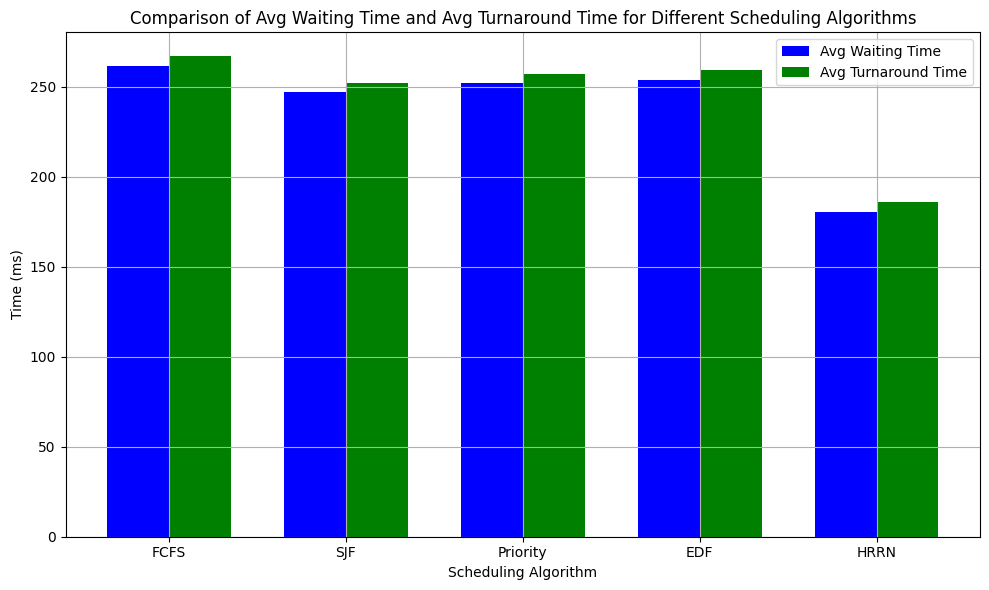

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# FCFS scheduling
def fcfs_scheduling(processes, n, burst_times, arrival_times):
    waiting_times = [0] * n
    turnaround_times = [0] * n
    current_time = 0

    for i in range(n):
        if current_time < arrival_times[i]:
            current_time = arrival_times[i]
        waiting_times[i] = current_time - arrival_times[i]
        turnaround_times[i] = waiting_times[i] + burst_times[i]
        current_time += burst_times[i]

    avg_waiting_time = sum(waiting_times) / n
    avg_turnaround_time = sum(turnaround_times) / n
    return avg_waiting_time, avg_turnaround_time

# SJF scheduling
def sjf_scheduling(processes, n, burst_times, arrival_times):
    sorted_indices = sorted(range(n), key=lambda x: (arrival_times[x], burst_times[x]))
    sorted_burst_times = [burst_times[i] for i in sorted_indices]
    sorted_arrival_times = [arrival_times[i] for i in sorted_indices]

    return fcfs_scheduling(
        [processes[i] for i in sorted_indices], n, sorted_burst_times, sorted_arrival_times
    )

# Priority Scheduling
def priority_scheduling(processes, n, burst_times, arrival_times, priorities):
    waiting_times = [0] * n
    turnaround_times = [0] * n
    current_time = 0
    completed = [False] * n

    for _ in range(n):
        idx = -1
        highest_priority = float('inf')

        for i in range(n):
            if arrival_times[i] <= current_time and not completed[i]:
                if priorities[i] < highest_priority:
                    highest_priority = priorities[i]
                    idx = i

        if idx != -1:
            waiting_times[idx] = current_time - arrival_times[idx]
            if waiting_times[idx] < 0:
                waiting_times[idx] = 0
            turnaround_times[idx] = waiting_times[idx] + burst_times[idx]
            current_time += burst_times[idx]
            completed[idx] = True
        else:
            current_time += 1

    avg_waiting_time = sum(waiting_times) / n
    avg_turnaround_time = sum(turnaround_times) / n
    return avg_waiting_time, avg_turnaround_time

# EDF scheduling
def edf_scheduling(processes, n, burst_times, arrival_times, deadlines):
    waiting_times = [0] * n
    turnaround_times = [0] * n
    current_time = 0
    completed = [False] * n

    for _ in range(n):
        idx = -1
        earliest_deadline = float('inf')

        for i in range(n):
            if arrival_times[i] <= current_time and not completed[i] and deadlines[i] < earliest_deadline:
                earliest_deadline = deadlines[i]
                idx = i

        if idx != -1:
            waiting_times[idx] = current_time - arrival_times[idx]
            if waiting_times[idx] < 0:
                waiting_times[idx] = 0
            turnaround_times[idx] = waiting_times[idx] + burst_times[idx]
            current_time += burst_times[idx]
            completed[idx] = True
        else:
            current_time += 1

    avg_waiting_time = sum(waiting_times) / n
    avg_turnaround_time = sum(turnaround_times) / n
    return avg_waiting_time, avg_turnaround_time

# HRRN scheduling
def hrrn_scheduling(processes, n, burst_times, arrival_times):
    waiting_times = [0] * n
    turnaround_times = [0] * n
    completed = [False] * n
    current_time = 0

    for _ in range(n):
        highest_response_ratio = -1
        idx = -1

        for i in range(n):
            if arrival_times[i] <= current_time and not completed[i]:
                response_ratio = ((current_time - arrival_times[i]) + burst_times[i]) / burst_times[i]
                if response_ratio > highest_response_ratio:
                    highest_response_ratio = response_ratio
                    idx = i

        if idx != -1:
            waiting_times[idx] = current_time - arrival_times[idx]
            if waiting_times[idx] < 0:
                waiting_times[idx] = 0
            turnaround_times[idx] = waiting_times[idx] + burst_times[idx]
            current_time += burst_times[idx]
            completed[idx] = True
        else:
            current_time += 1

    avg_waiting_time = sum(waiting_times) / n
    avg_turnaround_time = sum(turnaround_times) / n
    return avg_waiting_time, avg_turnaround_time

# Main function to read process details and plot bar graphs
if __name__ == "__main__":
    # Read data from CSV file
    df = pd.read_csv('OS_Processes_Updated.csv')

    processes = df['Process'].tolist()
    arrival_times = df['Arrival_Time'].tolist()
    burst_times = df['Burst_Time'].tolist()
    priorities = df['Priority'].tolist()
    deadlines = df['Deadline'].tolist()
    n = len(processes)

    # Run all algorithms and store the results
    results = {
        'Algorithm': [],
        'Avg Waiting Time': [],
        'Avg Turnaround Time': []
    }

    # FCFS
    results['Algorithm'].append('FCFS')
    fcfs_metrics = fcfs_scheduling(processes, n, burst_times.copy(), arrival_times)
    results['Avg Waiting Time'].append(fcfs_metrics[0])
    results['Avg Turnaround Time'].append(fcfs_metrics[1])

    # SJF
    results['Algorithm'].append('SJF')
    sjf_metrics = sjf_scheduling(processes, n, burst_times.copy(), arrival_times)
    results['Avg Waiting Time'].append(sjf_metrics[0])
    results['Avg Turnaround Time'].append(sjf_metrics[1])

    # Priority
    results['Algorithm'].append('Priority')
    priority_metrics = priority_scheduling(processes, n, burst_times.copy(), arrival_times, priorities)
    results['Avg Waiting Time'].append(priority_metrics[0])
    results['Avg Turnaround Time'].append(priority_metrics[1])

    # EDF
    results['Algorithm'].append('EDF')
    edf_metrics = edf_scheduling(processes, n, burst_times.copy(), arrival_times, deadlines)
    results['Avg Waiting Time'].append(edf_metrics[0])
    results['Avg Turnaround Time'].append(edf_metrics[1])

    # HRRN
    results['Algorithm'].append('HRRN')
    hrrn_metrics = hrrn_scheduling(processes, n, burst_times.copy(), arrival_times)
    results['Avg Waiting Time'].append(hrrn_metrics[0])
    results['Avg Turnaround Time'].append(hrrn_metrics[1])

    # Convert results to a DataFrame for easier plotting
    results_df = pd.DataFrame(results)

    # Set the width for each bar and position of bars
    bar_width = 0.35
    index = np.arange(len(results_df['Algorithm']))

    # Plot side-by-side bar charts
    plt.figure(figsize=(10, 6))
    
    plt.bar(index, results_df['Avg Waiting Time'], bar_width, label='Avg Waiting Time', color='blue')
    plt.bar(index + bar_width, results_df['Avg Turnaround Time'], bar_width, label='Avg Turnaround Time', color='green')

    # Add labels and title
    plt.xlabel('Scheduling Algorithm')
    plt.ylabel('Time (ms)')
    plt.title('Comparison of Avg Waiting Time and Avg Turnaround Time for Different Scheduling Algorithms')

    # Set x-axis labels and ticks
    plt.xticks(index + bar_width / 2, results_df['Algorithm'])

    # Display the legend
    plt.legend()

    # Add grid and show the plot
    plt.grid()
    plt.tight_layout()
    plt.show()

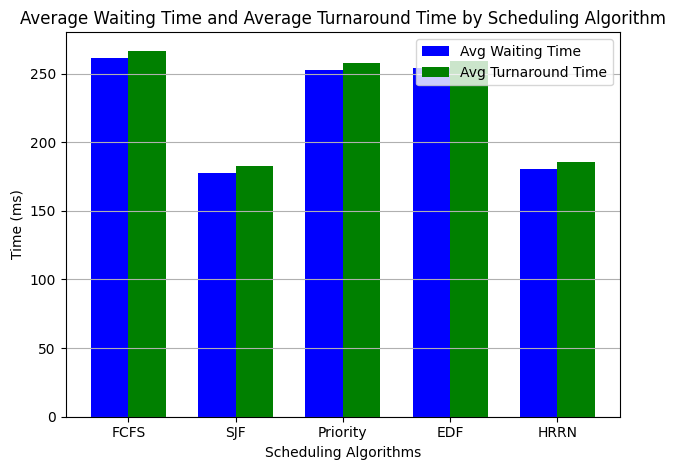

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for average waiting time and average turnaround time
algorithms = ['FCFS', 'SJF', 'Priority', 'EDF', 'HRRN']
avg_waiting_time = [261.53, 177.74, 252.43, 253.83, 180.52]
avg_turnaround_time = [266.76, 182.97, 257.66, 259.06, 185.75]

# Set the bar width
bar_width = 0.35
x = np.arange(len(algorithms))

# Create the bar plot
plt.bar(x, avg_waiting_time, width=bar_width, label='Avg Waiting Time', color='blue', align='center')
plt.bar(x + bar_width, avg_turnaround_time, width=bar_width, label='Avg Turnaround Time', color='green', align='center')

# Adding labels and title
plt.xlabel('Scheduling Algorithms')
plt.ylabel('Time (ms)')
plt.title('Average Waiting Time and Average Turnaround Time by Scheduling Algorithm')
plt.xticks(x + bar_width / 2, algorithms)  # Center the x-ticks
plt.legend()

# Show grid
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()